In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, svm

In [10]:
def run_rbf(input_data, input_targets, k = 4): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'rbf')
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring = 'accuracy', return_train_score = True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

def run_linear(input_data, input_targets, k = 4): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'linear')
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring='accuracy', return_train_score=True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

def run_polynomial(input_data, input_targets, degree, constant_coeff, k = 4): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'poly', degree = degree, coef0 = constant_coeff)
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring='accuracy', return_train_score=True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

In [1]:
def plot(input_data, input_targets, classifier):
  plt.scatter(input_data[:, 0], input_data[:, 1], c = input_targets)
  ax = plt.gca()
  ax_xlim, ax_ylim = (ax.get_xlim(), ax.get_ylim())
  target, data = np.meshgrid(np.linspace(ax_ylim[0], ax_ylim[1], 100), np.linspace(ax_xlim[0], ax_xlim[1], 100))
  ax.contour(data, target, classifier.decision_function(np.vstack([data.ravel(), target.ravel()]).T).reshape(data.shape), levels = [-1, 0, 1]) # levels only -1,0,1 to prevent other contours
  ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], facecolors='none'); # none to avoid coloring points of the line
  ax.set_xlim(ax_xlim)
  ax.set_ylim(ax_ylim)

Test score: 1.0


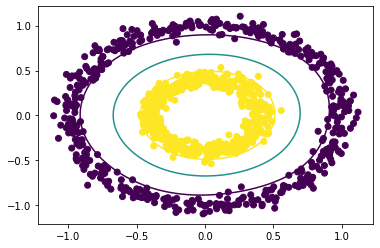

In [25]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.05, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.6


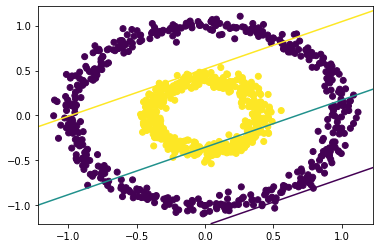

In [26]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.05, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_linear(input_data, input_targets))

Test score: 1.0


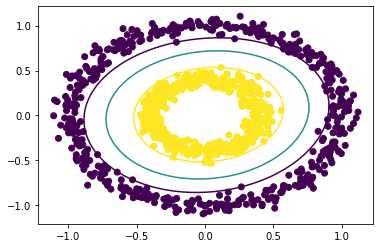

In [27]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.05, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 3, constant_coeff = 1))

Test score: 1.0


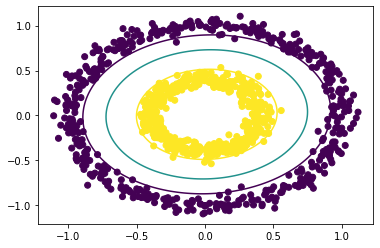

In [28]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.05, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 2, constant_coeff = 1))

Test score: 0.608


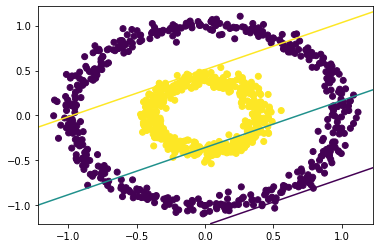

In [29]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.05, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 1, constant_coeff = 1))

Test score: 0.94


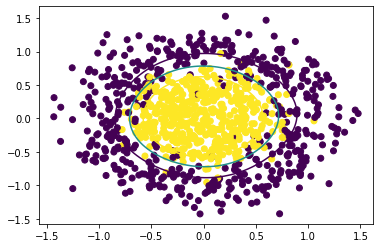

In [30]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.2, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.7


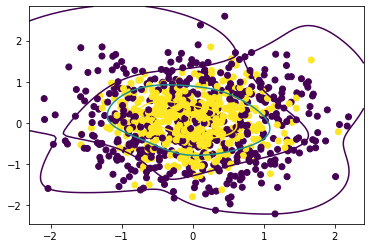

In [31]:
input_data, input_targets = sklearn.datasets.make_circles(n_samples = 1000, noise = 0.5, factor = 0.4, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 1.0


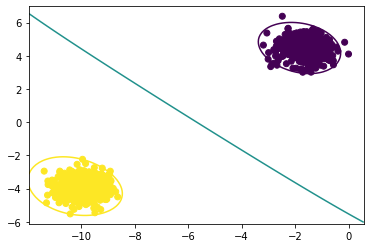

In [32]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 0.5, centers = 2, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 1.0


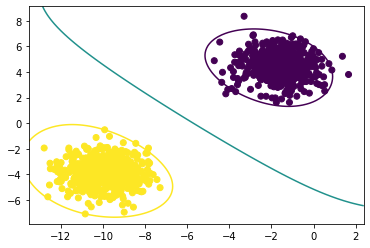

In [33]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 1, centers = 2, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 1.0


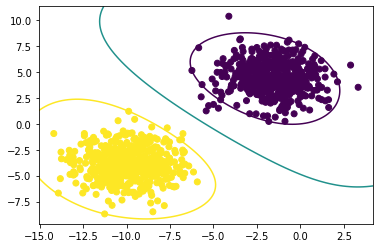

In [34]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 1.5, centers = 2, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.992


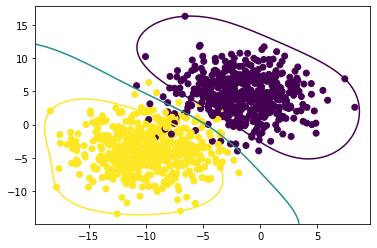

In [35]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 3, centers = 2, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.992


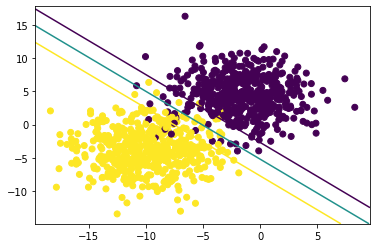

In [36]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 3, centers = 2, random_state = 1)
plot(input_data, input_targets, run_linear(input_data, input_targets))

Test score: 0.992


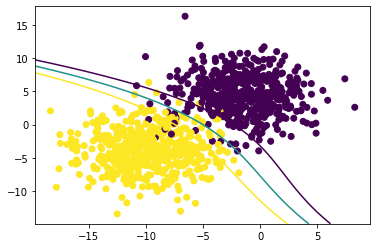

In [37]:
input_data, input_targets = sklearn.datasets.make_blobs(n_samples = 1000, cluster_std = 3, centers = 2, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 3, constant_coeff = 1))

Test score: 1.0


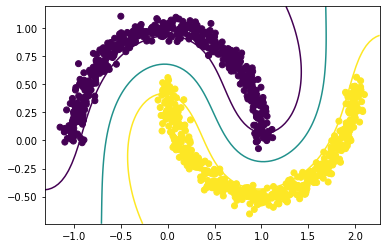

In [38]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.05, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 1.0


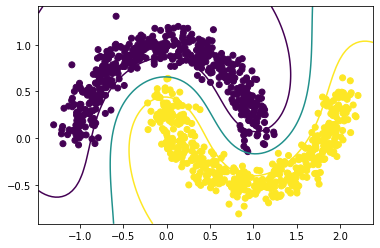

In [39]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.1, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.812


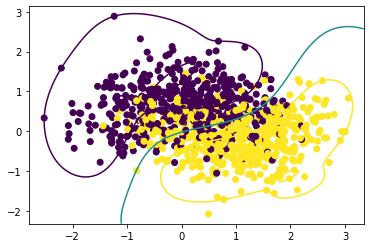

In [40]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.5, random_state = 1)
plot(input_data, input_targets, run_rbf(input_data, input_targets))

Test score: 0.864


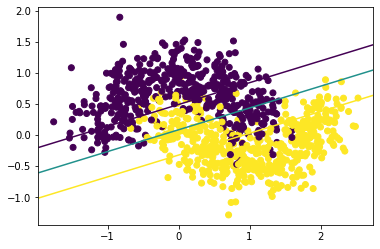

In [41]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.25, random_state = 1)
plot(input_data, input_targets, run_linear(input_data, input_targets))

Test score: 0.944


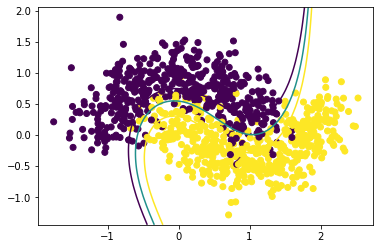

In [43]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.25, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 3, constant_coeff = 1))

Test score: 0.94


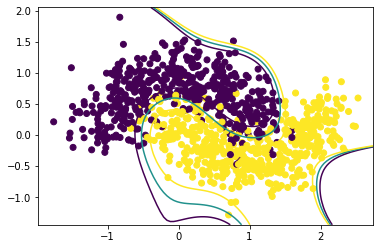

In [44]:
input_data, input_targets = sklearn.datasets.make_moons(n_samples = 1000, noise = 0.25, random_state = 1)
plot(input_data, input_targets, run_polynomial(input_data, input_targets, degree = 6, constant_coeff = 1))